<a href="https://colab.research.google.com/github/gorogoro-uk/Machine-Learning/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis with Python

---

Task: 

Use Python to demonstrate exploratory data analysis techniques on a sample dataset.

Diabetes dataset from UCI Repository:

https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

In [53]:
# import modules
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# get dataset from UCI
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv'
DATA_FILE = 'diabetes_data.txt'
urllib.request.urlretrieve(URL, DATA_FILE)

('diabetes_data.txt', <http.client.HTTPMessage at 0x7f11168d52e8>)

In [73]:
# import dataset into pandas dataframe
print(f"DATA_FILE: {DATA_FILE}")
df = pd.read_csv(DATA_FILE)
df.head()

DATA_FILE: diabetes_data.txt


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [75]:
# basic dataframe info
df.info()
# df.dtypes will show dataypes of columns only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

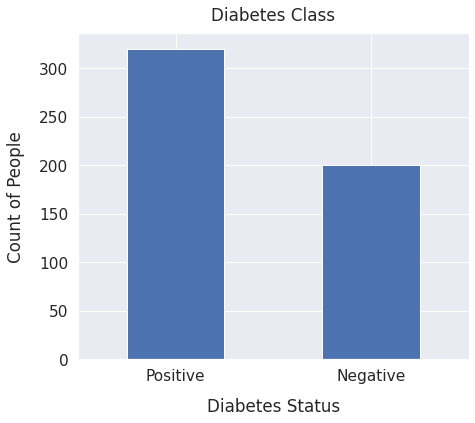

In [77]:
# histogram of target variable 'class'
sns.set(font_scale=1.4)
df['class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Diabetes Status", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Diabetes Class", y=1.02);

In [79]:
# encode target variable 'class' as integers
df['class'] = df['class'].astype('category')
df['class_cat'] = df['class'].cat.codes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 520 non-null    int64   
 1   Gender              520 non-null    object  
 2   Polyuria            520 non-null    object  
 3   Polydipsia          520 non-null    object  
 4   sudden weight loss  520 non-null    object  
 5   weakness            520 non-null    object  
 6   Polyphagia          520 non-null    object  
 7   Genital thrush      520 non-null    object  
 8   visual blurring     520 non-null    object  
 9   Itching             520 non-null    object  
 10  Irritability        520 non-null    object  
 11  delayed healing     520 non-null    object  
 12  partial paresis     520 non-null    object  
 13  muscle stiffness    520 non-null    object  
 14  Alopecia            520 non-null    object  
 15  Obesity             520 non-null    obje

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,class_cat
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,1


In [81]:
# encode categorical features as integers
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    df[col+'_cat'] = df[col].cat.codes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     520 non-null    int64   
 1   Gender                  520 non-null    category
 2   Polyuria                520 non-null    category
 3   Polydipsia              520 non-null    category
 4   sudden weight loss      520 non-null    category
 5   weakness                520 non-null    category
 6   Polyphagia              520 non-null    category
 7   Genital thrush          520 non-null    category
 8   visual blurring         520 non-null    category
 9   Itching                 520 non-null    category
 10  Irritability            520 non-null    category
 11  delayed healing         520 non-null    category
 12  partial paresis         520 non-null    category
 13  muscle stiffness        520 non-null    category
 14  Alopecia                52

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,class_cat,Gender_cat,Polyuria_cat,Polydipsia_cat,sudden weight loss_cat,weakness_cat,Polyphagia_cat,Genital thrush_cat,visual blurring_cat,Itching_cat,Irritability_cat,delayed healing_cat,partial paresis_cat,muscle stiffness_cat,Alopecia_cat,Obesity_cat
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

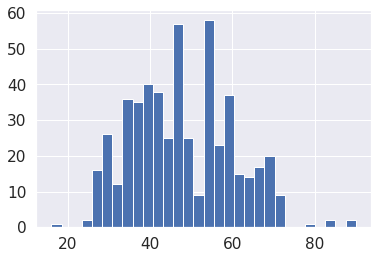

In [84]:
# histogram of numerical variable 'Age'
df['Age'].hist(bins=30)
df['Age'].describe()

In [88]:
df.select_dtypes(include=['int8']).columns.values

array(['class_cat', 'Gender_cat', 'Polyuria_cat', 'Polydipsia_cat',
       'sudden weight loss_cat', 'weakness_cat', 'Polyphagia_cat',
       'Genital thrush_cat', 'visual blurring_cat', 'Itching_cat',
       'Irritability_cat', 'delayed healing_cat', 'partial paresis_cat',
       'muscle stiffness_cat', 'Alopecia_cat', 'Obesity_cat'],
      dtype=object)